In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [22]:
# Read an image
img_path = "../images/"
img_name = "circles_1.webp"
img = cv.imread(img_path + img_name, cv.IMREAD_COLOR)

# Reduce the size of image
n_rows, n_cols = img.shape[:2]
x_scale = 0.3
y_scale = 0.3
img = cv.resize(img, (int(n_cols * x_scale), int(n_rows * y_scale)), interpolation=cv.INTER_CUBIC)

img_edge = cv.Canny(img, 150, 200, None, 3)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [27]:
img.shape

(720, 900, 3)

In [24]:
# Do Hough transform
radius = np.arange(20, 200, 2)
circles = skimage.transform.hough_circle(img_edge, radius)
accums, cx, cy, radii = skimage.transform.hough_circle_peaks(circles, radius, threshold = 0.65 * np.max(circles))

In [20]:
radii.shape

(12,)

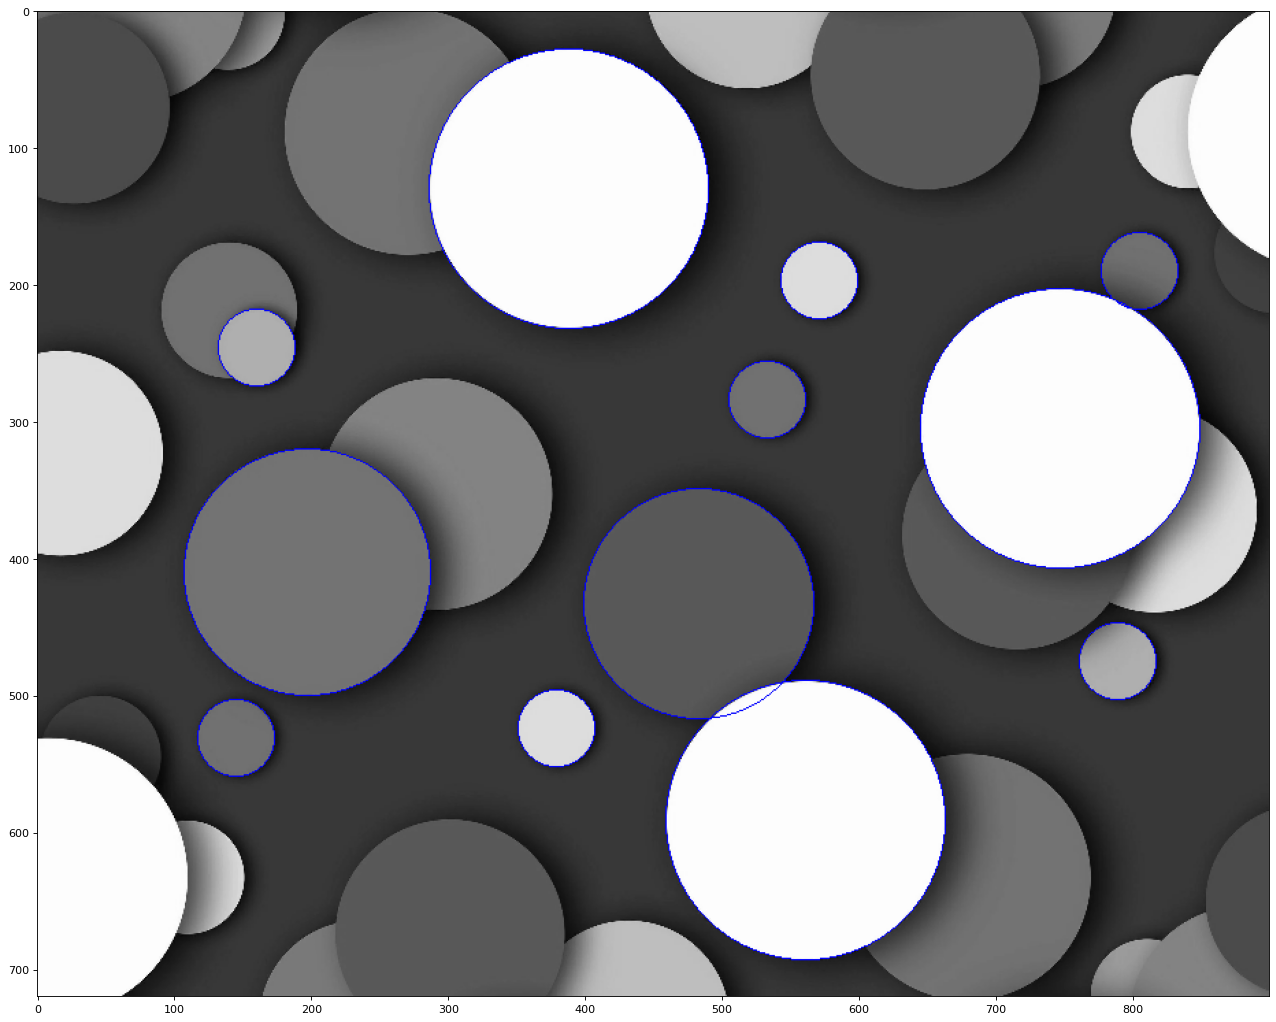

In [30]:
img_out = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)
for center_y, center_x, rad in zip(cy, cx, radii):
    circy, circx = skimage.draw.circle_perimeter(center_y, center_x, int(round(rad)), shape=img_out.shape)
    img_out[circy, circx] = (0, 0, 255)
plt.figure(figsize=(32, 16), dpi=80)
plt.imshow(img_out)

plt.savefig(img_path + img_name.rpartition('.')[0] + '_classic_hough.jpg')